# Architure Style Classification Project
This kernel is about different architure style found across globe. This dataset is available on kaggle and the link is https://www.kaggle.com/wwymak/architecture-dataset.

In [1]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project='architecture-style-classification-project')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/aarshibhatt112/architecture-style-classification-project


<IPython.core.display.Javascript object>

In [1]:
!pip install git+https://github.com/ufoym/imbalanced-dataset-sampler.git # GITHUB REPO FOR IMBALANCED DATASET SAMPLER 
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import Dataset, random_split, Subset
from torchsampler import ImbalancedDatasetSampler
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

  Cloning https://github.com/ufoym/imbalanced-dataset-sampler.git to /tmp/pip-req-build-dcd01xpk
  Running command git clone -q https://github.com/ufoym/imbalanced-dataset-sampler.git /tmp/pip-req-build-dcd01xpk
  Created wheel for torchsampler: filename=torchsampler-0.1-py3-none-any.whl size=3650 sha256=d30b65a4145dd0a478e41642592f1db9915e96bcbff6ef45756ac50cd58e693a
  Stored in directory: /tmp/pip-ephem-wheel-cache-p02opu4k/wheels/07/aa/b0/ae7a750c8c2b50cd3d3116fb1200d93a006eaa7c48048b862c
Successfully built torchsampler


I have downloaded the data from above mentioned link and performed some pre-processing offline. 
I split made 2 seperate folder i.e train and test dataset. I chose images at random for test and train set and renamed them zipped the file a .zip and uploaded the dataset on Kaggle (.zip files doesn't require to be 'unzipped' and extract the entire dataset was extracted to input folder without unzipping it)
You can chose to use my processed dataset at https://www.kaggle.com/aarshibhatt112/archiset. Or if you want to do you own preprocessing on the main dataset you use the code below.

**NOTE**: The input directory is read-only you can't make changes there also if you make a directory at same level as input you can view the directory structure on this right side tab. That's why processed the dataset on my pc. 

In [ ]:
# TO SPLIT THE DATA INTO TRAIN AND TEST SET

# source = "../Downloads/Dataset/train"
# dest = "../Downloads/Dataset/test"
# files = os.listdir(source)
# import shutil
# import random 
# for file in files:
#     for imgs in os.listdir(source + '/' + file):
#         if random.random() < 0.17:
#             shutil.move(source + '/'+ file + '/' + imgs, dest + '/' + file)
# print('done')

# TO RENAME THE FILES 

# for file in files:
#     for count, imgs in enumerate(os.listdir(source + '/' + file)):
#         dst ="img_" + str(count) + ".jpg"
#         src =source + '/' + file +'/' + imgs   #CURRENTLY POINT TO TRAIN SET 
#         dst = source + '/' + file +'/'+ dst
#         os.rename(src, dst) 
# print('done')

#TO GET THE DIRECTORY STRUCTURE ON KAGGLE THE PATH TO DATASET 

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
data_dir = '/kaggle/input/Dataset/'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['labels.txt', 'test', 'train']
['Achaemenid architecture', 'Palladian architecture', 'Beaux-Arts architecture', 'Georgian architecture', 'Byzantine architecture', 'Tudor Revival architecture', 'Baroque architecture', 'Deconstructivism', 'Greek Revival architecture', 'Art Deco architecture', 'American craftsman style', 'Chicago school architecture', 'Romanesque architecture', 'Russian Revival architecture', 'International style', 'Postmodern architecture', 'Queen Anne architecture', 'Ancient Egyptian architecture', 'American Foursquare architecture', 'Art Nouveau architecture', 'Novelty architecture', 'Bauhaus architecture', 'Colonial architecture', 'Edwardian architecture']


As you can above there are in total 24 classes (the original one has 25, dropped on class)
The classes are as :
* 'Byzantine architecture' ,
* 'Queen Anne architecture', 
* 'Georgian architecture',
* 'American Foursquare architecture', 
* 'Bauhaus architecture',
* 'Postmodern architecture', 
* 'Baroque architecture', 
* 'Deconstructivism',
* 'Tudor Revival architecture', 
* 'Edwardian architecture', 
* 'Chicago school architecture',
* 'Romanesque architecture',
* 'International style',
* 'American craftsman style',
* 'Russian Revival architecture',
* 'Novelty architecture',
* 'Palladian architecture',
* 'Greek Revival architecture',
* 'Art Deco architecture',
* 'Art Nouveau architecture',
* 'Achaemenid architecture',
* 'Colonial architecture',
* 'Beaux-Arts architecture',
* 'Ancient Egyptian architecture'


Let' look at one such class

In [3]:
decon_files = os.listdir(data_dir + "/train/Deconstructivism")
print('No. of training examples for Deconstructivism Style :', len(decon_files))
print(decon_files[:5])

No. of training examples for Deconstructivism Style : 127
['img_7.jpg', 'img_14.jpg', 'img_27.jpg', 'img_16.jpg', 'img_44.jpg']


Split dataset train dataset onto 2 part validation set and training set. you can chose any ratio but I prefer 3:7.

In [4]:
dataset = ImageFolder(data_dir+'/train')

class DatasetFromSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)
    
    
    
lengths = [int(len(dataset)*0.8), int(len(dataset)*0.2)]
train_subset, val_subset = random_split(dataset, lengths)

transforms1 = tt.Compose([
    tt.RandomHorizontalFlip(),
    tt.Resize((512, 512)),
    tt.ToTensor()
])

transforms2 = tt.Compose([
    tt.Resize((512, 512)),
    tt.ToTensor()
])
    
train_dataset = DatasetFromSubset(
    train_subset, transform=transforms1
)
val_dataset = DatasetFromSubset(
    val_subset, transform=transforms2
)
# len(train_dataset), len(val_dataset)

img, label = train_dataset[0]
print(img.shape, label)

torch.Size([3, 512, 512]) 8


In [5]:
img, label = train_dataset[14]
print(img.shape, label, dataset.classes[label])

torch.Size([3, 512, 512]) 16 International style


In [6]:
print(dataset.classes)

['Achaemenid architecture', 'American Foursquare architecture', 'American craftsman style', 'Ancient Egyptian architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Byzantine architecture', 'Chicago school architecture', 'Colonial architecture', 'Deconstructivism', 'Edwardian architecture', 'Georgian architecture', 'Greek Revival architecture', 'International style', 'Novelty architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 'Romanesque architecture', 'Russian Revival architecture', 'Tudor Revival architecture']


In [7]:
import matplotlib.pyplot as plt

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  International style (16)


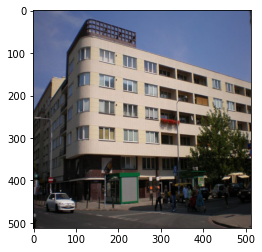

In [8]:
show_example(*train_dataset[14])

In [10]:
random_seed = 10
torch.manual_seed(random_seed);
batch_size=10

In [11]:
train_dl = DataLoader(train_dataset, batch_size, sampler=ImbalancedDatasetSampler(train_subset), num_workers=4, pin_memory=True)
val_dl = DataLoader(val_dataset, batch_size*2, num_workers=4, pin_memory=True)

In [12]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

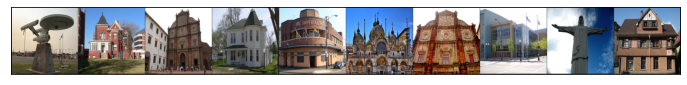

In [13]:
show_batch(train_dl)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text major ticklabel objects>)

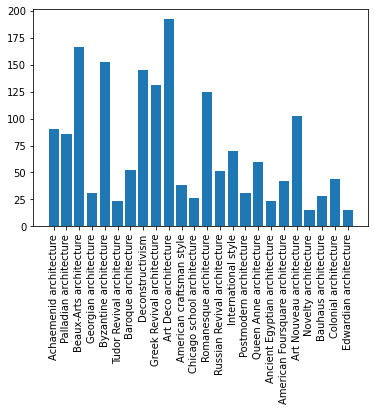

In [14]:
ans = dict()
for _, label in train_dataset:
    if label in ans.keys():
        ans[label] += 1
    else: 
        ans[label] = 1
# ans.items()
xlabel = classes
plt.bar(classes, ans.values())
plt.xticks(rotation=90)

In [15]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [16]:
class ArchitectureResnet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet101(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 24)
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))
    
#     def freeze(self):
#         # To freeze the residual layers
#         for param in self.network.parameters():
#             param.require_grad = False
#         for param in self.network.fc.parameters():
#             param.require_grad = True
    
#     def unfreeze(self):
#         # Unfreeze all layers
#         for param in self.network.parameters():
#             param.require_grad = True

In [17]:
model = ArchitectureResnet()
model

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


ArchitectureResnet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(

In [ ]:
# for images, labels in train_dl:
#     print('images.shape:', images.shape)
#     out = model2(images)
#     print('out.shape:', out.shape)
#     print('out[0]:', out[0])
#     break

if high usage switch

In [18]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)
            

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [19]:
device = get_default_device()
device

device(type='cuda')

In [20]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [ ]:
# for images, labels in train_dl:
#     print('images.shape:', images.shape)
#     out = simple_model(images)
#     print('out.shape:', out.shape)
#     break

In [21]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [22]:
model = to_device(ArchitectureResnet(), device)

In [23]:
history = [evaluate(model, val_dl)]
history

[{'val_loss': 3.1762301921844482, 'val_acc': 0.022727275267243385}]

In [24]:
num_epochs = 20
# opt_func = torch.optim.Adam
lr = 0.01

In [25]:
history += fit(num_epochs, lr, model, train_dl, val_dl)

Epoch [0], train_loss: 3.0025, val_loss: 2.9822, val_acc: 0.1742
Epoch [1], train_loss: 2.9048, val_loss: 2.9192, val_acc: 0.1303
Epoch [2], train_loss: 2.8486, val_loss: 2.8515, val_acc: 0.1538
Epoch [3], train_loss: 2.7887, val_loss: 2.7961, val_acc: 0.2826
Epoch [4], train_loss: 2.7276, val_loss: 2.7382, val_acc: 0.3909
Epoch [5], train_loss: 2.6970, val_loss: 2.6964, val_acc: 0.4288
Epoch [6], train_loss: 2.6584, val_loss: 2.6782, val_acc: 0.4053
Epoch [7], train_loss: 2.6301, val_loss: 2.6505, val_acc: 0.4561
Epoch [8], train_loss: 2.6090, val_loss: 2.6300, val_acc: 0.4515
Epoch [9], train_loss: 2.5801, val_loss: 2.6186, val_acc: 0.4924
Epoch [10], train_loss: 2.5630, val_loss: 2.6036, val_acc: 0.4780
Epoch [11], train_loss: 2.5568, val_loss: 2.5878, val_acc: 0.4917
Epoch [12], train_loss: 2.5238, val_loss: 2.5800, val_acc: 0.4970
Epoch [13], train_loss: 2.5112, val_loss: 2.5732, val_acc: 0.5205
Epoch [14], train_loss: 2.5137, val_loss: 2.5621, val_acc: 0.5311
Epoch [15], train_lo

In [26]:
num_epochs = 20
opt_func = torch.optim.Adam
lr = 0.01
history += fit(num_epochs, lr, model, train_dl, val_dl)

Epoch [0], train_loss: 2.4395, val_loss: 2.5176, val_acc: 0.5848
Epoch [1], train_loss: 2.4318, val_loss: 2.5160, val_acc: 0.6121
Epoch [2], train_loss: 2.4351, val_loss: 2.5069, val_acc: 0.6341
Epoch [3], train_loss: 2.4101, val_loss: 2.5075, val_acc: 0.6371
Epoch [4], train_loss: 2.4078, val_loss: 2.5026, val_acc: 0.6568
Epoch [5], train_loss: 2.4060, val_loss: 2.5020, val_acc: 0.6424
Epoch [6], train_loss: 2.3918, val_loss: 2.4988, val_acc: 0.6591
Epoch [7], train_loss: 2.3897, val_loss: 2.4949, val_acc: 0.6818
Epoch [8], train_loss: 2.3840, val_loss: 2.4904, val_acc: 0.6795
Epoch [9], train_loss: 2.3730, val_loss: 2.4890, val_acc: 0.6742
Epoch [10], train_loss: 2.3714, val_loss: 2.4864, val_acc: 0.6765
Epoch [11], train_loss: 2.3717, val_loss: 2.4911, val_acc: 0.6856
Epoch [12], train_loss: 2.3670, val_loss: 2.4861, val_acc: 0.6947
Epoch [13], train_loss: 2.3656, val_loss: 2.4884, val_acc: 0.6962
Epoch [14], train_loss: 2.3632, val_loss: 2.4818, val_acc: 0.7008
Epoch [15], train_lo

In [27]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 0.001
history += fit(num_epochs, lr, model, train_dl, val_dl)

Epoch [0], train_loss: 2.3454, val_loss: 2.4809, val_acc: 0.7144
Epoch [1], train_loss: 2.3397, val_loss: 2.4763, val_acc: 0.7068
Epoch [2], train_loss: 2.3311, val_loss: 2.4778, val_acc: 0.7023
Epoch [3], train_loss: 2.3395, val_loss: 2.4778, val_acc: 0.7091
Epoch [4], train_loss: 2.3338, val_loss: 2.4789, val_acc: 0.7023
Epoch [5], train_loss: 2.3449, val_loss: 2.4757, val_acc: 0.7235
Epoch [6], train_loss: 2.3373, val_loss: 2.4736, val_acc: 0.7182
Epoch [7], train_loss: 2.3438, val_loss: 2.4769, val_acc: 0.7106
Epoch [8], train_loss: 2.3450, val_loss: 2.4855, val_acc: 0.7053
Epoch [9], train_loss: 2.3357, val_loss: 2.4777, val_acc: 0.7098
Epoch [10], train_loss: 2.3398, val_loss: 2.4791, val_acc: 0.7152
Epoch [11], train_loss: 2.3418, val_loss: 2.4724, val_acc: 0.7091
Epoch [12], train_loss: 2.3373, val_loss: 2.4798, val_acc: 0.7129
Epoch [13], train_loss: 2.3349, val_loss: 2.4742, val_acc: 0.7250
Epoch [14], train_loss: 2.3370, val_loss: 2.4795, val_acc: 0.7136
Epoch [15], train_lo

In [28]:
num_epochs = 40
opt_func = torch.optim.Adam
lr = 0.001
history += fit(num_epochs, lr, model, train_dl, val_dl)

Epoch [0], train_loss: 2.3465, val_loss: 2.4761, val_acc: 0.7348
Epoch [1], train_loss: 2.3303, val_loss: 2.4746, val_acc: 0.7136
Epoch [2], train_loss: 2.3277, val_loss: 2.4738, val_acc: 0.7303
Epoch [3], train_loss: 2.3278, val_loss: 2.4725, val_acc: 0.7242
Epoch [4], train_loss: 2.3333, val_loss: 2.4783, val_acc: 0.7167
Epoch [5], train_loss: 2.3258, val_loss: 2.4756, val_acc: 0.7235
Epoch [6], train_loss: 2.3270, val_loss: 2.4774, val_acc: 0.7159
Epoch [7], train_loss: 2.3302, val_loss: 2.4758, val_acc: 0.7212
Epoch [8], train_loss: 2.3338, val_loss: 2.4746, val_acc: 0.7280
Epoch [9], train_loss: 2.3225, val_loss: 2.4775, val_acc: 0.7235
Epoch [10], train_loss: 2.3293, val_loss: 2.4751, val_acc: 0.7129
Epoch [11], train_loss: 2.3291, val_loss: 2.4758, val_acc: 0.7250
Epoch [12], train_loss: 2.3236, val_loss: 2.4759, val_acc: 0.7220
Epoch [13], train_loss: 2.3398, val_loss: 2.4782, val_acc: 0.7273
Epoch [14], train_loss: 2.3321, val_loss: 2.4744, val_acc: 0.7326
Epoch [15], train_lo

In [29]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

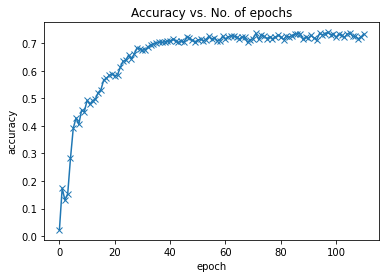

In [30]:
plot_accuracies(history)

In [31]:
transforms = tt.Compose([
    tt.Resize((512, 512)),
    tt.ToTensor()
])
test_dataset = ImageFolder(data_dir+'/test', transform=transforms)
img, label = test_dataset[197]
print(img.shape, label)

torch.Size([3, 512, 512]) 7


In [32]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

In [33]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Baroque architecture (6)


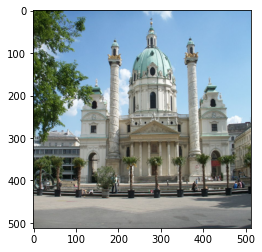

In [34]:
 show_example(*test_dataset[185])

Label: Baroque architecture , Predicted: Baroque architecture


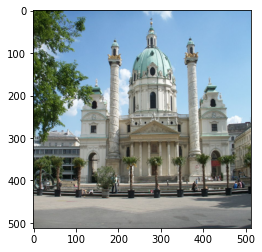

In [35]:
img, label = test_dataset[185]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Colonial architecture , Predicted: Colonial architecture


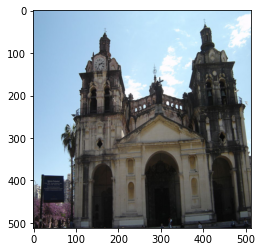

In [37]:
img, label = test_dataset[239]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Romanesque architecture , Predicted: Byzantine architecture


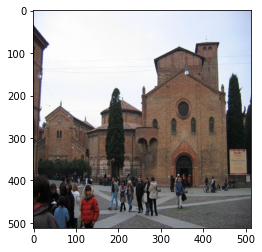

In [46]:
img, label = test_dataset[421]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [38]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 2.4462313652038574, 'val_acc': 0.7807453870773315}

In [47]:
# !pip install jovian --upgrade --quiet
import jovian
jovian.commit(project='architecture-style-classification-project')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/aarshibhatt112/architecture-style-classification-project


<IPython.core.display.Javascript object>